In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import spacy
import seaborn as sns
from fuzzywuzzy import fuzz
import networkx as nx
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import Levenshtein as lev
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("/Users/mollyrudisill/Voxcroft/data_processed.csv", index_col="Unnamed: 0")

In [3]:
subset_train = df[:1000]
subset_train

,Article_Date_Published,Article_Body,Name,Identity_Type,Article_Source,Voice,Article_Themes_AI_Model,Article_Subject_Keyword_Identified,Article_Topic_Keyword_Identified,Position,Article
0,2024-06-11 07:34:17,Reading Time: 3 minutes\nIsrael’s parliament m...,BENNY GANTZ,People,sabcnews.com,NaN,"[Primary: Conflict, war and peace|92% |Seconda...",NaN,Armed Conflict|Crime & Terrorism|State Security,0.0,0.0
1,2024-06-11 07:34:17,Reading Time: 3 minutes\nIsrael’s parliament m...,BENJAMIN NETANYAHU,People,sabcnews.com,NaN,"[Primary: Conflict, war and peace|92% |Seconda...",NaN,Armed Conflict|Crime & Terrorism|State Security,1.0,0.0
2,2024-06-11 07:34:17,Reading Time: 3 minutes\nIsrael’s parliament m...,YOAV GALLANT,People,sabcnews.com,NaN,"[Primary: Conflict, war and peace|92% |Seconda...",NaN,Armed Conflict|Crime & Terrorism|State Security,2.0,0.0
3,2024-06-11 07:34:17,Reading Time: 3 minutes\nIsrael’s parliament m...,GADI EISENKOT,People,sabcnews.com,NaN,"[Primary: Conflict, war and peace|92% |Seconda...",NaN,Armed Conflict|Crime & Terrorism|State Security,3.0,0.0
4,2024-06-11 07:34:17,Reading Time: 3 minutes\nIsrael’s parliament m...,BEZALEL SMOTRICH,People,sabcnews.com,NaN,"[Primary: Conflict, war and peace|92% |Seconda...",NaN,Armed Conflict|Crime & Terrorism|State Security,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
995,2024-06-10 22:15:00,"At Pixley ka Isaka Seme Street, the ANC headqu...",MANTASHE,People,iol.co.za,Siyabonga Sithole,"[Primary: Conflict, war and peace|68% |Seconda...",ANC|Cyril Ramaphosa|DA|EFF|Johannesburg|South ...,Civil Unrest & Protest|Natural Disasters,11.0,102.0
996,2024-06-10 22:15:00,"At Pixley ka Isaka Seme Street, the ANC headqu...",RAYMOND ZONDO,People,iol.co.za,Siyabonga Sithole,"[Primary: Conflict, war and peace|68% |Seconda...",ANC|Cyril Ramaphosa|DA|EFF|Johannesburg|South ...,Civil Unrest & Protest|Natural Disasters,12.0,102.0
997,2024-06-10 22:15:00,"At Pixley ka Isaka Seme Street, the ANC headqu...",XOLILE GEORGE,People,iol.co.za,Siyabonga Sithole,"[Primary: Conflict, war and peace|68% |Seconda...",ANC|Cyril Ramaphosa|DA|EFF|Johannesburg|South ...,Civil Unrest & Protest|Natural Disasters,13.0,102.0
998,2024-06-10 22:15:00,"At Pixley ka Isaka Seme Street, the ANC headqu...",NHLAMULO NDHLELA,People,iol.co.za,Siyabonga Sithole,"[Primary: Conflict, war and peace|68% |Seconda...",ANC|Cyril Ramaphosa|DA|EFF|Johannesburg|South ...,Civil Unrest & Protest|Natural Disasters,14.0,102.0


In [4]:
def collect_all_words(df, columns):
    # Initialize an empty list to store words
    all_words = []
    
    # Iterate over each specified column
    for column in columns:
        # Iterate over each value in the specified column
        for value in df[column]:
            # Check if the value is a string
            if isinstance(value, str):
                # Split the value by "|" and extend the list with the words
                words = value.split("|")
                all_words.extend(words)
    
    return all_words

wordswords = collect_all_words(subset_train, ["Name"])
wordswords

['BENNY GANTZ',
 'BENJAMIN NETANYAHU',
 'YOAV GALLANT',
 'GADI EISENKOT',
 'BEZALEL SMOTRICH',
 'ASSAF SHAPIRA',
 'INBAL TZACH',
 'TAL SHOHAM',
 'SMOTRICH',
 'MATHABATHA',
 'STAN MATHABATHA',
 'REUBEN MADADZHE',
 'REGGIE MOLOKOMME',
 'DANNY NDLOVU',
 'FRANS MOKWELE',
 'ROSEMARY MOLEPO',
 'JEREMIAH NGOBENI',
 'JIMMY MACHAKA',
 'AXED MK',
 'JABULANI KHUMALO',
 'AJAY GUPTA',
 'LETHABO LEJOY',
 'CHRISTALL KAY',
 'JABULANI KHUMALO',
 'JABULANI KHUMALO',
 'JABULANI KHUMALO',
 'JACOB ZUMA',
 'JACOB ZUMA',
 'KHUMALO',
 'RAYMOND ZONDO',
 'RAYMOND ZONDO',
 'MAGASHULE',
 'ACE MAGASHULE',
 'ACE MAGASHULE',
 'MLUNGISI LOUW',
 'MOROADI CHOLOTA',
 'ROBERT NETSHIUNDA',
 'AJAY GUPTA',
 'GUPTA',
 'ATUL GUPTA',
 'GUPTA',
 'ATUL',
 'AJAY',
 'RAJESH',
 'LETHABO LEJOY',
 'CHRISTALL KAY',
 'LETHABO ‘LEJOY’ MATHATHO',
 'CHRISTALL KAY',
 'LEJOY',
 'MATHATHO',
 'CHRISTALL KAY',
 'MEL VILJOEN',
 'LIZ PRINS',
 'GOGO',
 'MANDISA RADEBE',
 'SHAUN HOLLAND',
 'KYLIE JENNER',
 'RICHARD HUGGARD/GETTY IMAGES',
 'GUMEDE'

In [5]:
from collections import Counter
entities_count = Counter(wordswords)

for entity, count in entities_count.items():
    print(f'{entity}: {count}')

BENNY GANTZ: 4
BENJAMIN NETANYAHU: 3
YOAV GALLANT: 2
GADI EISENKOT: 1
BEZALEL SMOTRICH: 1
ASSAF SHAPIRA: 1
INBAL TZACH: 1
TAL SHOHAM: 1
SMOTRICH: 1
MATHABATHA: 1
STAN MATHABATHA: 1
REUBEN MADADZHE: 1
REGGIE MOLOKOMME: 1
DANNY NDLOVU: 1
FRANS MOKWELE: 1
ROSEMARY MOLEPO: 1
JEREMIAH NGOBENI: 1
JIMMY MACHAKA: 1
AXED MK: 2
JABULANI KHUMALO: 5
AJAY GUPTA: 2
LETHABO LEJOY: 2
CHRISTALL KAY: 4
JACOB ZUMA: 7
KHUMALO: 1
RAYMOND ZONDO: 8
MAGASHULE: 2
ACE MAGASHULE: 3
MLUNGISI LOUW: 1
MOROADI CHOLOTA: 1
ROBERT NETSHIUNDA: 1
GUPTA: 9
ATUL GUPTA: 1
ATUL: 2
AJAY: 2
RAJESH: 2
LETHABO ‘LEJOY’ MATHATHO: 1
LEJOY: 1
MATHATHO: 1
MEL VILJOEN: 1
LIZ PRINS: 1
GOGO: 1
MANDISA RADEBE: 1
SHAUN HOLLAND: 1
KYLIE JENNER: 1
RICHARD HUGGARD/GETTY IMAGES: 1
GUMEDE: 4
KOLBE: 3
CELIMPILO GUMEDE: 3
PAUL HARDING: 1
CHESLIN KOLBE: 6
SAULOS CHILIMA: 4
SAULOS KLAUS: 4
VALENTINO PHIRI: 1
LAZARUS MCCARTHY: 1
SHANIL DZIMBIRI: 2
BAKILI MULUZI: 2
SHANIL MULUZI: 1
MULUZI: 1
CHAKWERA: 14
AXING: 2
NIGEL SIBANDA/: 1
GRANDI THEUNISSEN:

In [6]:
counted = pd.DataFrame(list(entities_count.items()), columns=['Word', 'Count'] )
counted_sorted = counted.sort_values(by="Count", ascending=False)
counted_sorted.head(50)


,Word,Count
78,RAMAPHOSA,24
325,ZUMA,19
135,NAN,15
59,CHAKWERA,14
241,ZVEREV,12
431,MARKRAM,11
429,MAHARAJ,10
236,ALCARAZ,10
478,KOKO,10
414,BAFANA,9


In [7]:
top10 = counted_sorted.head(10)
top10 = top10.sort_values(by="Count", ascending=False)

In [8]:
fig = px.bar(top10, x='Word', y='Count', color="Word")
fig.show()

In [9]:
# Ensure the list of names is properly handled
subset_train['Name'] = subset_train['Name'].astype(str).fillna('')

# Function to calculate distance matrix using fuzzy string matching, considering partial matches
def calculate_distance_matrix(strings):
    n = len(strings)
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            if isinstance(strings[i], str) and isinstance(strings[j], str):
                # Calculate similarity using fuzz.ratio
                full_ratio = fuzz.ratio(strings[i], strings[j])
                
                # Initialize partial ratios
                partial_ratio1 = partial_ratio2 = partial_ratio3 = partial_ratio4 = 0
                
                # Split names
                name1_parts = strings[i].split()
                name2_parts = strings[j].split()
                
                # Calculate partial ratios safely
                if len(name1_parts) > 0 and len(name2_parts) > 0:
                    partial_ratio1 = fuzz.partial_ratio(name1_parts[0], strings[j])
                    partial_ratio2 = fuzz.partial_ratio(strings[i], name2_parts[0])
                
                if len(name1_parts) > 1 and len(name2_parts) > 1:
                    partial_ratio3 = fuzz.partial_ratio(name1_parts[-1], strings[j])
                    partial_ratio4 = fuzz.partial_ratio(strings[i], name2_parts[-1])
                
                # Use the maximum similarity score among these
                max_ratio = max(full_ratio, partial_ratio1, partial_ratio2, partial_ratio3, partial_ratio4)
                # Convert similarity to distance
                distance_matrix[i, j] = distance_matrix[j, i] = 100 - max_ratio
    
    return distance_matrix


/var/folders/dk/95f115l12ms7fs6v815_g44c0000gn/T/ipykernel_50460/3707934371.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
# Calculate the distance matrix for the full dataset
overall_distance_matrix = calculate_distance_matrix(subset_train["Name"])


In [16]:
# Perform hierarchical clustering
linked = linkage(overall_distance_matrix, method='average')

# Form clusters based on a distance threshold
threshold = 50  # Adjust this threshold based on your specific needs
subset_train['Cluster'] = fcluster(linked, threshold, criterion='distance')

# Create a DataFrame to see the clusters
clustered_names = pd.DataFrame({'Name': subset_train['Name'], 'Cluster': subset_train['Cluster']})

# Select a representative name for each cluster (e.g., the most common name in the cluster)
representative_names = clustered_names.groupby('Cluster')['Name'].apply(lambda x: x.mode().iloc[0]).to_dict()

# Map each name to its representative name
subset_train['Standardized Name'] = subset_train['Cluster'].map(representative_names)

# Display the updated DataFrame
subset_train

/var/folders/dk/95f115l12ms7fs6v815_g44c0000gn/T/ipykernel_50460/956006335.py:2: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix

/var/folders/dk/95f115l12ms7fs6v815_g44c0000gn/T/ipykernel_50460/956006335.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/dk/95f115l12ms7fs6v815_g44c0000gn/T/ipykernel_50460/956006335.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Article_Date_Published,Article_Body,Name,Identity_Type,Article_Source,Voice,Article_Themes_AI_Model,Article_Subject_Keyword_Identified,Article_Topic_Keyword_Identified,Position,Article,Cluster,Standardized Name
0,2024-06-11 07:34:17,Reading Time: 3 minutes\nIsrael’s parliament m...,BENNY GANTZ,People,sabcnews.com,NaN,"[Primary: Conflict, war and peace|92% |Seconda...",NaN,Armed Conflict|Crime & Terrorism|State Security,0.0,0.0,60,BENNY GANTZ
1,2024-06-11 07:34:17,Reading Time: 3 minutes\nIsrael’s parliament m...,BENJAMIN NETANYAHU,People,sabcnews.com,NaN,"[Primary: Conflict, war and peace|92% |Seconda...",NaN,Armed Conflict|Crime & Terrorism|State Security,1.0,0.0,59,BENJAMIN NETANYAHU
2,2024-06-11 07:34:17,Reading Time: 3 minutes\nIsrael’s parliament m...,YOAV GALLANT,People,sabcnews.com,NaN,"[Primary: Conflict, war and peace|92% |Seconda...",NaN,Armed Conflict|Crime & Terrorism|State Security,2.0,0.0,274,YOAV GALLANT
3,2024-06-11 07:34:17,Reading Time: 3 minutes\nIsrael’s parliament m...,GADI EISENKOT,People,sabcnews.com,NaN,"[Primary: Conflict, war and peace|92% |Seconda...",NaN,Armed Conflict|Crime & Terrorism|State Security,3.0,0.0,135,GADI EISENKOT
4,2024-06-11 07:34:17,Reading Time: 3 minutes\nIsrael’s parliament m...,BEZALEL SMOTRICH,People,sabcnews.com,NaN,"[Primary: Conflict, war and peace|92% |Seconda...",NaN,Armed Conflict|Crime & Terrorism|State Security,4.0,0.0,260,BEZALEL SMOTRICH
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2024-06-10 22:15:00,"At Pixley ka Isaka Seme Street, the ANC headqu...",MANTASHE,People,iol.co.za,Siyabonga Sithole,"[Primary: Conflict, war and peace|68% |Seconda...",ANC|Cyril Ramaphosa|DA|EFF|Johannesburg|South ...,Civil Unrest & Protest|Natural Disasters,11.0,102.0,344,MANTASHE
996,2024-06-10 22:15:00,"At Pixley ka Isaka Seme Street, the ANC headqu...",RAYMOND ZONDO,People,iol.co.za,Siyabonga Sithole,"[Primary: Conflict, war and peace|68% |Seconda...",ANC|Cyril Ramaphosa|DA|EFF|Johannesburg|South ...,Civil Unrest & Protest|Natural Disasters,12.0,102.0,404,RAYMOND ZONDO
997,2024-06-10 22:15:00,"At Pixley ka Isaka Seme Street, the ANC headqu...",XOLILE GEORGE,People,iol.co.za,Siyabonga Sithole,"[Primary: Conflict, war and peace|68% |Seconda...",ANC|Cyril Ramaphosa|DA|EFF|Johannesburg|South ...,Civil Unrest & Protest|Natural Disasters,13.0,102.0,75,XOLILE GEORGE
998,2024-06-10 22:15:00,"At Pixley ka Isaka Seme Street, the ANC headqu...",NHLAMULO NDHLELA,People,iol.co.za,Siyabonga Sithole,"[Primary: Conflict, war and peace|68% |Seconda...",ANC|Cyril Ramaphosa|DA|EFF|Johannesburg|South ...,Civil Unrest & Protest|Natural Disasters,14.0,102.0,235,NHLAMULO NDHLELA


In [17]:
# Find all names in the same clusters or nearby clusters
def find_nearby_clusters(cluster_df, target_name, distance_threshold):
    if cluster_df[cluster_df['Name'] == target_name].empty:
        return pd.DataFrame()  # Return an empty DataFrame if the target name is not found
    target_cluster = cluster_df[cluster_df['Name'] == target_name]['Cluster'].values[0]
    nearby_clusters = cluster_df[abs(cluster_df['Cluster'] - target_cluster) <= distance_threshold]
    return nearby_clusters

# Example usage to find names in the same cluster or nearby clusters
target_name = 'BENNY GANTZ'  # Example name
distance_threshold = 1  # Adjust as needed
nearby_clusters = find_nearby_clusters(subset_train, target_name, distance_threshold)
if not nearby_clusters.empty:
    print(f"Names in the same or nearby clusters as {target_name} with their cluster numbers:")
    print(nearby_clusters[['Name', 'Cluster']])
else:
    print(f"No clusters found for {target_name}.")

Names in the same or nearby clusters as BENNY GANTZ with their cluster numbers:
                   Name  Cluster
0           BENNY GANTZ       60
1    BENJAMIN NETANYAHU       59
460         BENNY GANTZ       60
461  BENJAMIN NETANYAHU       59
465         BENNY GANTZ       60
466  BENJAMIN NETANYAHU       59
491               JANET       61
500         BENNY GANTZ       60


In [18]:
subset_train['Name'] = subset_train['Name'].astype(str).fillna('')

# Identify identical names and group them together
identical_names = subset_train.groupby('Name').size().reset_index(name='counts')
identical_names = identical_names[identical_names['counts'] > 1]['Name']

# Create a mapping for identical names
identical_name_clusters = {}
current_cluster = 1

for name in identical_names:
    identical_name_clusters[name] = current_cluster
    current_cluster += 1

# Assign clusters to identical names
subset_train['Cluster'] = subset_train['Name'].map(identical_name_clusters)

# Separate remaining names that are not identical
remaining_names = subset_train[subset_train['Cluster'].isna()]['Name']

/var/folders/dk/95f115l12ms7fs6v815_g44c0000gn/T/ipykernel_50460/3849169541.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/dk/95f115l12ms7fs6v815_g44c0000gn/T/ipykernel_50460/3849169541.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
# Function to calculate distance matrix using fuzzy string matching, considering partial matches
def calculate_distance_matrix(strings):
    n = len(strings)
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            # Calculate similarity using fuzz.ratio
            full_ratio = fuzz.ratio(strings[i], strings[j])
            
            # Initialize partial ratios
            partial_ratio1 = partial_ratio2 = partial_ratio3 = partial_ratio4 = 0
            
            # Split names
            name1_parts = strings[i].split()
            name2_parts = strings[j].split()
            
            # Calculate partial ratios safely
            if len(name1_parts) > 0 and len(name2_parts) > 0:
                partial_ratio1 = fuzz.partial_ratio(name1_parts[0], strings[j])
                partial_ratio2 = fuzz.partial_ratio(strings[i], name2_parts[0])
            
            if len(name1_parts) > 1 and len(name2_parts) > 1:
                partial_ratio3 = fuzz.partial_ratio(name1_parts[-1], strings[j])
                partial_ratio4 = fuzz.partial_ratio(strings[i], name2_parts[-1])
            
            # Use the maximum similarity score among these
            max_ratio = max(full_ratio, partial_ratio1, partial_ratio2, partial_ratio3, partial_ratio4)
            # Convert similarity to distance
            distance_matrix[i, j] = distance_matrix[j, i] = 100 - max_ratio
    
    return distance_matrix

In [20]:
# Calculate the distance matrix for the remaining names
if not remaining_names.empty:
    remaining_names_list = remaining_names.tolist()
    distance_matrix = calculate_distance_matrix(remaining_names_list)

    # Perform hierarchical clustering
    linked = linkage(distance_matrix, method='average')

    # Form clusters based on a distance threshold
    threshold = 40  # Adjust this threshold based on your specific needs
    remaining_clusters = fcluster(linked, threshold, criterion='distance')

    # Map remaining clusters back to the DataFrame
    cluster_map = {name: cluster for name, cluster in zip(remaining_names_list, remaining_clusters)}
    subset_train['Cluster'].fillna(subset_train['Name'].map(cluster_map), inplace=True)

# Create a DataFrame to see the clusters
clustered_names = pd.DataFrame({'Name': subset_train['Name'], 'Cluster': subset_train['Cluster']})

# Select a representative name for each cluster (e.g., the most common name in the cluster)
representative_names = clustered_names.groupby('Cluster')['Name'].apply(lambda x: x.mode().iloc[0]).to_dict()

# Map each name to its representative name
subset_train['Standardized Name'] = subset_train['Cluster'].map(representative_names)

# Display the updated DataFrame
subset_train

/var/folders/dk/95f115l12ms7fs6v815_g44c0000gn/T/ipykernel_50460/1775001140.py:7: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix

/var/folders/dk/95f115l12ms7fs6v815_g44c0000gn/T/ipykernel_50460/1775001140.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/dk/95f115l12ms7fs6v815_g44c0000gn/T/ipykernel_50460/1775001140.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Article_Date_Published,Article_Body,Name,Identity_Type,Article_Source,Voice,Article_Themes_AI_Model,Article_Subject_Keyword_Identified,Article_Topic_Keyword_Identified,Position,Article,Cluster,Standardized Name
0,2024-06-11 07:34:17,Reading Time: 3 minutes\nIsrael’s parliament m...,BENNY GANTZ,People,sabcnews.com,NaN,"[Primary: Conflict, war and peace|92% |Seconda...",NaN,Armed Conflict|Crime & Terrorism|State Security,0.0,0.0,26.0,BENNY GANTZ
1,2024-06-11 07:34:17,Reading Time: 3 minutes\nIsrael’s parliament m...,BENJAMIN NETANYAHU,People,sabcnews.com,NaN,"[Primary: Conflict, war and peace|92% |Seconda...",NaN,Armed Conflict|Crime & Terrorism|State Security,1.0,0.0,25.0,BENJAMIN NETANYAHU
2,2024-06-11 07:34:17,Reading Time: 3 minutes\nIsrael’s parliament m...,YOAV GALLANT,People,sabcnews.com,NaN,"[Primary: Conflict, war and peace|92% |Seconda...",NaN,Armed Conflict|Crime & Terrorism|State Security,2.0,0.0,191.0,YOAV GALLANT
3,2024-06-11 07:34:17,Reading Time: 3 minutes\nIsrael’s parliament m...,GADI EISENKOT,People,sabcnews.com,NaN,"[Primary: Conflict, war and peace|92% |Seconda...",NaN,Armed Conflict|Crime & Terrorism|State Security,3.0,0.0,237.0,GADI EISENKOT
4,2024-06-11 07:34:17,Reading Time: 3 minutes\nIsrael’s parliament m...,BEZALEL SMOTRICH,People,sabcnews.com,NaN,"[Primary: Conflict, war and peace|92% |Seconda...",NaN,Armed Conflict|Crime & Terrorism|State Security,4.0,0.0,185.0,VLADIMIR PUTIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2024-06-10 22:15:00,"At Pixley ka Isaka Seme Street, the ANC headqu...",MANTASHE,People,iol.co.za,Siyabonga Sithole,"[Primary: Conflict, war and peace|68% |Seconda...",ANC|Cyril Ramaphosa|DA|EFF|Johannesburg|South ...,Civil Unrest & Protest|Natural Disasters,11.0,102.0,201.0,MANTASHE
996,2024-06-10 22:15:00,"At Pixley ka Isaka Seme Street, the ANC headqu...",RAYMOND ZONDO,People,iol.co.za,Siyabonga Sithole,"[Primary: Conflict, war and peace|68% |Seconda...",ANC|Cyril Ramaphosa|DA|EFF|Johannesburg|South ...,Civil Unrest & Protest|Natural Disasters,12.0,102.0,152.0,RAYMOND ZONDO
997,2024-06-10 22:15:00,"At Pixley ka Isaka Seme Street, the ANC headqu...",XOLILE GEORGE,People,iol.co.za,Siyabonga Sithole,"[Primary: Conflict, war and peace|68% |Seconda...",ANC|Cyril Ramaphosa|DA|EFF|Johannesburg|South ...,Civil Unrest & Protest|Natural Disasters,13.0,102.0,283.0,XOLILE GEORGE
998,2024-06-10 22:15:00,"At Pixley ka Isaka Seme Street, the ANC headqu...",NHLAMULO NDHLELA,People,iol.co.za,Siyabonga Sithole,"[Primary: Conflict, war and peace|68% |Seconda...",ANC|Cyril Ramaphosa|DA|EFF|Johannesburg|South ...,Civil Unrest & Protest|Natural Disasters,14.0,102.0,194.0,ZVEREV


In [21]:
# Calculate the overall distance matrix combining all clusters
all_names = subset_train['Name'].tolist()
overall_distance_matrix = calculate_distance_matrix(all_names)

# Display the overall distance matrix
overall_distance_df = pd.DataFrame(overall_distance_matrix, index=all_names, columns=all_names)
print("Overall Distance Matrix:")
overall_distance_df


Overall Distance Matrix:


,BENNY GANTZ,BENJAMIN NETANYAHU,YOAV GALLANT,GADI EISENKOT,BEZALEL SMOTRICH,ASSAF SHAPIRA,INBAL TZACH,TAL SHOHAM,SMOTRICH,MATHABATHA,...,RAMAPHOSA,RAMAPHOSA,CYRIL,ZIZI,KODWA,MANTASHE,RAYMOND ZONDO,XOLILE GEORGE,NHLAMULO NDHLELA,GOODENOUGH MASHEGO
BENNY GANTZ,0.0,40.0,33.0,50.0,60.0,80.0,40.0,67.0,88.0,71.0,...,89.0,89.0,80.0,71.0,80.0,62.0,60.0,75.0,71.0,60.0
BENJAMIN NETANYAHU,40.0,0.0,50.0,50.0,57.0,67.0,59.0,33.0,75.0,58.0,...,67.0,67.0,80.0,75.0,80.0,50.0,57.0,67.0,57.0,70.0
YOAV GALLANT,33.0,50.0,0.0,50.0,57.0,60.0,57.0,33.0,75.0,60.0,...,43.0,43.0,75.0,100.0,50.0,62.0,50.0,67.0,57.0,71.0
GADI EISENKOT,50.0,50.0,50.0,0.0,50.0,50.0,62.0,65.0,62.0,75.0,...,75.0,75.0,75.0,50.0,60.0,71.0,60.0,62.0,71.0,50.0
BEZALEL SMOTRICH,60.0,57.0,57.0,50.0,0.0,71.0,40.0,33.0,0.0,68.0,...,67.0,67.0,60.0,75.0,80.0,60.0,71.0,66.0,57.0,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MANTASHE,62.0,50.0,62.0,71.0,60.0,50.0,50.0,33.0,62.0,44.0,...,60.0,60.0,100.0,100.0,80.0,0.0,71.0,83.0,62.0,38.0
RAYMOND ZONDO,60.0,57.0,50.0,60.0,71.0,71.0,75.0,67.0,71.0,86.0,...,43.0,43.0,80.0,75.0,50.0,71.0,0.0,77.0,40.0,60.0
XOLILE GEORGE,75.0,67.0,67.0,62.0,66.0,82.0,60.0,67.0,67.0,100.0,...,83.0,83.0,60.0,75.0,80.0,83.0,77.0,0.0,62.0,50.0
NHLAMULO NDHLELA,71.0,57.0,57.0,71.0,57.0,71.0,60.0,50.0,75.0,69.0,...,62.0,62.0,80.0,100.0,60.0,62.0,40.0,62.0,0.0,62.0


/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:530: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:530: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



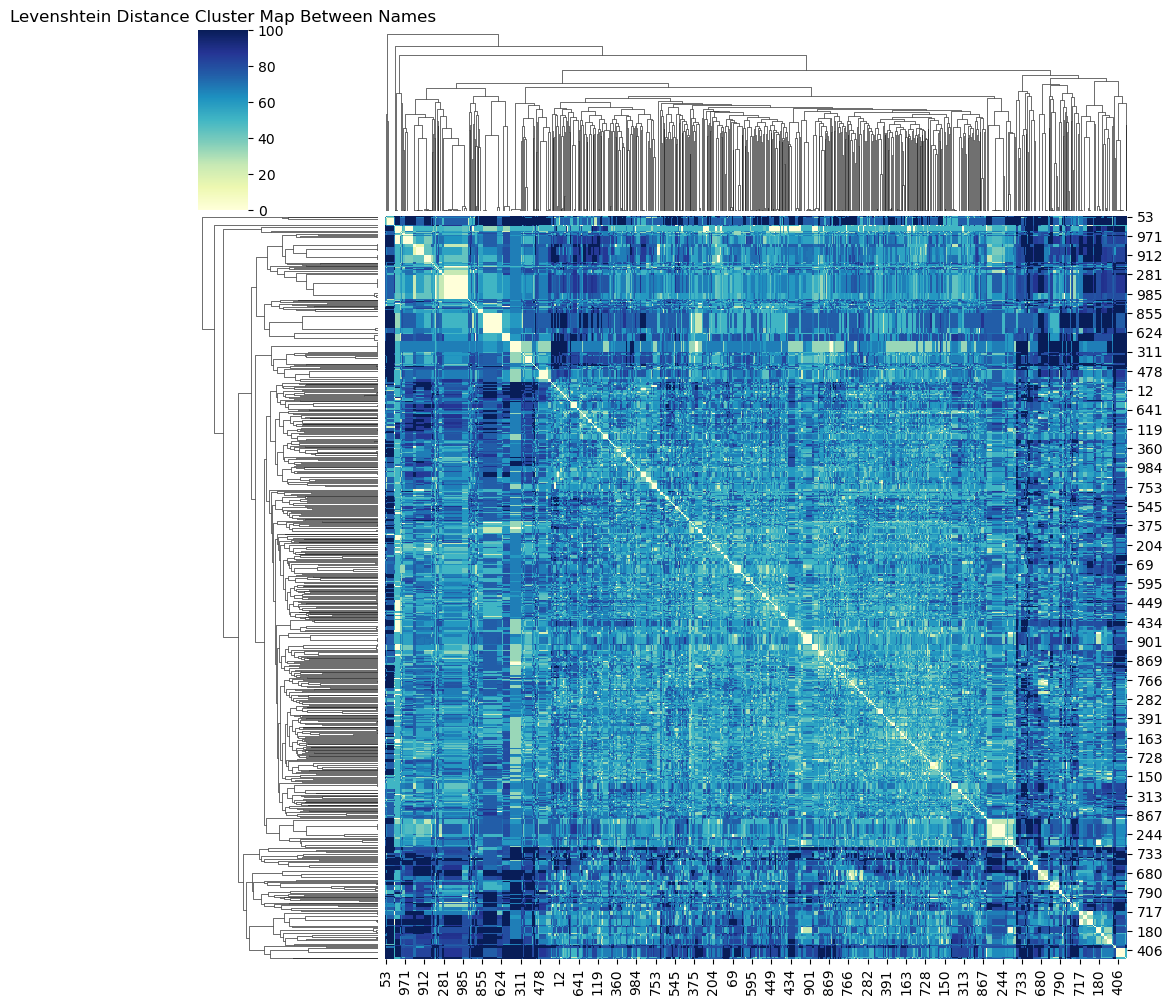

IndexError: index 0 is out of bounds for axis 0 with size 0

In [22]:
# Plot the cluster map if there are remaining names
if not remaining_names.empty:
    sns.clustermap(overall_distance_matrix, annot=False, cmap="YlGnBu")
    plt.title('Levenshtein Distance Cluster Map Between Names')
    plt.show()

# Find all names in the same clusters or nearby clusters
def find_nearby_clusters(cluster_df, target_name, distance_threshold):
    target_cluster = cluster_df[cluster_df['Name'] == target_name]['Cluster'].values[0]
    nearby_clusters = cluster_df[abs(cluster_df['Cluster'] - target_cluster) <= distance_threshold]
    return nearby_clusters

# Example usage to find names in the same cluster or nearby clusters
target_name = 'Benny Gantz'
distance_threshold = 1  # Adjust as needed
nearby_clusters = find_nearby_clusters(subset_train, target_name, distance_threshold)
print(f"Names in the same or nearby clusters as {target_name} with their cluster numbers:")
print(nearby_clusters[['Name', 'Cluster']])

In [23]:
# Example usage to find names in the same cluster or nearby clusters
def get_nearby_cluster(df, targetname, distancethreshold):
    target_name = targetname  # Example name
    distance_threshold = distancethreshold  # Adjust as needed
    nearby_clusters = find_nearby_clusters(df, target_name, distance_threshold)
    if not nearby_clusters.empty:
        print(f"Names in the same or nearby clusters as {target_name} with their cluster numbers:")
        print(nearby_clusters[['Name', 'Cluster']])
    else:
        print(f"No clusters found for {target_name}.")

In [24]:
def find_names_in_cluster(df, cluster_label):
    return df[df['Cluster'] == cluster_label]['Name'].tolist()


In [25]:
def find_rows_with_name(df, name):
    # Convert the name to uppercase to ensure case-insensitive matching
    name = name.upper()
    # Filter the DataFrame to find rows containing the name
    rows_with_name = df[df['Name'].str.contains(name, case=False, na=False)]
    return rows_with_name

find_rows_with_name(subset_train, "BIDEN")

,Article_Date_Published,Article_Body,Name,Identity_Type,Article_Source,Voice,Article_Themes_AI_Model,Article_Subject_Keyword_Identified,Article_Topic_Keyword_Identified,Position,Article,Cluster,Standardized Name
444,2024-06-11 01:14:41,Reading Time: 2 minutes\nThe United Nations Se...,JOE BIDEN,People,sabcnews.com,NaN,"[Primary: Conflict, war and peace|95% |Seconda...",NaN,Armed Conflict|Crime & Terrorism,0.0,42.0,85.0,JOE BIDEN
445,2024-06-11 01:14:41,Reading Time: 2 minutes\nThe United Nations Se...,BIDEN,People,sabcnews.com,NaN,"[Primary: Conflict, war and peace|95% |Seconda...",NaN,Armed Conflict|Crime & Terrorism,1.0,42.0,29.0,BIDEN
463,2024-06-11 01:04:29,Ambassadors of the Security Council vote in fa...,JOE BIDEN,People,dailymaverick.co.za,NaN,"[Primary: Conflict, war and peace|97% |Seconda...",NaN,Armed Conflict|Civil Unrest & Protest|Crime & ...,4.0,46.0,85.0,JOE BIDEN
496,2024-06-11 01:04:29,Ambassadors of the Security Council vote in fa...,BIDEN,People,dailymaverick.co.za,NaN,"[Primary: Conflict, war and peace|97% |Seconda...",NaN,Armed Conflict|Civil Unrest & Protest|Crime & ...,37.0,46.0,29.0,BIDEN
502,2024-06-11 01:04:29,Ambassadors of the Security Council vote in fa...,BIDEN,People,dailymaverick.co.za,NaN,"[Primary: Conflict, war and peace|97% |Seconda...",NaN,Armed Conflict|Civil Unrest & Protest|Crime & ...,43.0,46.0,29.0,BIDEN
504,2024-06-11 01:04:29,Ambassadors of the Security Council vote in fa...,BIDEN,People,dailymaverick.co.za,NaN,"[Primary: Conflict, war and peace|97% |Seconda...",NaN,Armed Conflict|Civil Unrest & Protest|Crime & ...,45.0,46.0,29.0,BIDEN
505,2024-06-11 01:04:29,Ambassadors of the Security Council vote in fa...,BIDEN,People,dailymaverick.co.za,NaN,"[Primary: Conflict, war and peace|97% |Seconda...",NaN,Armed Conflict|Civil Unrest & Protest|Crime & ...,46.0,46.0,29.0,BIDEN
506,2024-06-11 01:04:29,Ambassadors of the Security Council vote in fa...,BIDEN,People,dailymaverick.co.za,NaN,"[Primary: Conflict, war and peace|97% |Seconda...",NaN,Armed Conflict|Civil Unrest & Protest|Crime & ...,47.0,46.0,29.0,BIDEN
508,2024-06-11 01:04:29,Ambassadors of the Security Council vote in fa...,BIDEN,People,dailymaverick.co.za,NaN,"[Primary: Conflict, war and peace|97% |Seconda...",NaN,Armed Conflict|Civil Unrest & Protest|Crime & ...,49.0,46.0,29.0,BIDEN
551,2024-06-11 00:25:38,New York — The UN Security Council on Monday b...,JOE BIDEN,People,businesslive.co.za,Michelle Nichols,"[Primary: Conflict, war and peace|93% |Seconda...",NaN,Armed Conflict|Crime & Terrorism,0.0,52.0,85.0,JOE BIDEN
